# 第6章 k平均法：教師なし学習モデルの基礎

## 「06-k_means.py」の解説

ITエンジニアための機械学習理論入門「第6章 k平均法:教師なし学習モデルの基礎」で使用しているサンプルコード「06-k_means.py」の解説です。

※ 解説用にコードの内容は少し変更しています。
※ 講義で準備した環境(Python3系)で動作するようにいくつか修正・追加を行っています。

### Google Colaboratory でファイルを読み込むための準備

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

os.chdir('/content/drive/My Drive/dataset')

## k-means 法による画像圧縮

はじめに必要なモジュールをインポートしておきます。

特に、画像データを扱うためにPILモジュールを利用します。

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

画像ファイル「photo.jpg」が用意されていることを確認します。

In [4]:
!ls -l photo.jpg

-rw------- 1 root root 47187 Nov 21 03:42 photo.jpg


画像ファイル「photo.jpg」を読み込みます。

In [0]:
im = Image.open("photo.jpg")    

画像を表示してみます。白、赤、緑の３色を中心に構成された画像です。

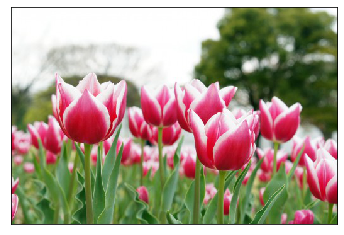

In [6]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

画像データを各ピクセルの (R,G,B) を並べたリストに変換します。

In [0]:
pixels = list(im.convert('RGB').getdata())    

リストの先頭部分を確認すると、次のようになります。

In [8]:
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

このリストから、k平均法で「代表色」を決定する関数を用意します。

k個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [0]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print("Initial centers:"),
    print(map(lambda x: x.tolist(), center))
    print("========================")
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            if num_points[i] == 0:
                center_new[i] = np.array([0,0,0])
            else:
                center_new[i] = center_new[i] / num_points[i]
        center = center_new
        print(map(lambda x: x.tolist(), center))
        print("Distortion: J=%d" % distortion_new)

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
        
    # 画像データの各ピクセルを代表色で置き換え
    new_pixels = []
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))

    print("Done.")
    return new_pixels

例として、2つのクラスターに分類します。

In [10]:
result = run_kmeans(pixels, 2)

Initial centers:
Distortion: J=1790926683
Distortion: J=946676425
Distortion: J=903893499
Distortion: J=899296529
Distortion: J=898762376
Done.


結果を画像として表示します。

In [0]:
# float から int に変換 (Python3系のみ)
result_int = []
for i in range(len(result)):
    tmp_result = tuple(map(int, result[i]))
    result_int.append(tmp_result)

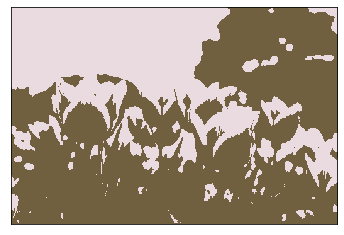

In [12]:
im.putdata(result_int)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

同様に3つのクラスターに分類します。

In [13]:
result = run_kmeans(pixels, 3)

Initial centers:
Distortion: J=4213609703
Distortion: J=865423051
Distortion: J=732976605
Distortion: J=685741772
Distortion: J=654130175
Distortion: J=630138256
Distortion: J=613007042
Distortion: J=601405264
Distortion: J=593669716
Distortion: J=588758226
Distortion: J=585665916
Distortion: J=583581697
Distortion: J=581942642
Distortion: J=580675142
Distortion: J=579658220
Distortion: J=578866296
Distortion: J=578252363
Distortion: J=577753991
Done.


結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

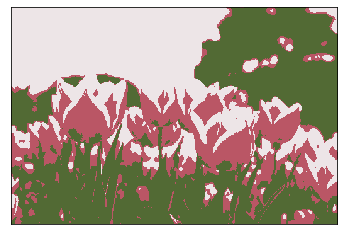

In [14]:
result_int = []
for i in range(len(result)):
    tmp_result = tuple(map(int, result[i]))
    result_int.append(tmp_result)

im.putdata(result_int)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

最後に、8つのクラスターに分類して、結果を画像として表示してみます。

In [15]:
result = run_kmeans(pixels, 8)

Initial centers:
Distortion: J=2179180626
Distortion: J=887769579
Distortion: J=425779337
Distortion: J=246323394
Distortion: J=220000503
Distortion: J=205156856
Distortion: J=195757053
Distortion: J=188528646
Distortion: J=180755707
Distortion: J=170015693
Distortion: J=160068181
Distortion: J=154323446
Distortion: J=151234845
Distortion: J=149406385
Distortion: J=148143696
Distortion: J=147153467
Distortion: J=146333787
Distortion: J=145576256
Distortion: J=144898399
Distortion: J=144239335
Distortion: J=143632467
Distortion: J=143103209
Distortion: J=142628213
Distortion: J=142163831
Distortion: J=141731703
Distortion: J=141356312
Distortion: J=141021247
Distortion: J=140729716
Distortion: J=140493372
Distortion: J=140296853
Distortion: J=140136513
Distortion: J=140012610
Done.


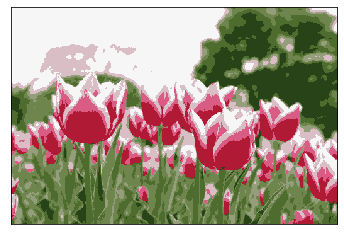

In [16]:
result_int = []
for i in range(len(result)):
    tmp_result = tuple(map(int, result[i]))
    result_int.append(tmp_result)

im.putdata(result_int)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

インターネットから好きな画像をダウンロードして試すこともできます。ここでは、無償利用可能なフリー素材をダウンロードしてみます。

In [17]:
!curl -OL http://2.bp.blogspot.com/-4SSFZUa0ab4/Vg57ivCMfhI/AAAAAAAAyzQ/Pm4eBFxAaOc/s800/sweets_fruit_pafe.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  308k  100  308k    0     0   468k      0 --:--:-- --:--:-- --:--:--  468k


ダウンロードしたファイルを確認します。

In [18]:
!ls *.png

sweets_fruit_pafe.png


ファイルを読み込んで表示します。

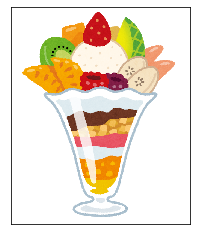

In [19]:
im = Image.open("sweets_fruit_pafe.png")
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

RBG形式のデータに変換して、5つのクラスターに分類します。背景の透明色部分は、黒色に変換される点に注意してください。

In [20]:
pixels = list(im.convert('RGB').getdata())
result = run_kmeans(pixels, 5)

Initial centers:
Distortion: J=8959151299
Distortion: J=841928741
Distortion: J=770586361
Distortion: J=706641972
Distortion: J=700024007
Distortion: J=697282917
Distortion: J=695298530
Distortion: J=694020009
Distortion: J=693452056
Done.


結果を表示して確認します。

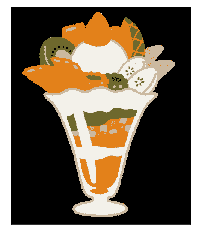

In [21]:
result_int = []
for i in range(len(result)):
    tmp_result = tuple(map(int, result[i]))
    result_int.append(tmp_result)

im.putdata(result_int)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)